# Chapter 3: Rule-Based AI in Connect Four

We'll first create a game environment for the popular everyday game Connect Four in this chapter. Similar to what we have done in Chapter 2, we'll create AI players in this game. Specifically, we'll hard code in some rules to make the AI player think up to three steps ahead. You'll then deploy the strategies against a random player or against each other to see how effective they are. As we discussed in Chapter 2, coding in rule-based AI serves several purposes. Other than learning to build rule-based AI and generalize it to real-world situations, you'll learn to create a game environment for Connect Four that has all the attributes and methods of a typical OpenAI Gym game environment. You'll also use Connect Four to study other AI algorithms later in this book, such as MiniMax, Monte Carlo Tree Search, Actor-Critic. You'll also use rule-based AI to train AlphaGo agents later in this book and use rule-based AI as benchmarks to test teh effectiveness of other AI algorithms.

When the AI player thinks one step ahead, it iterates through all possible next moves and check if any one of them leads to winning the game right away. If yes, the AI player will take the move. This is very similar to what we have done in the game of Tic Tac Toe. However, thinking two steps ahead in Connect Four is a bit more complicated. The AI player’s next move can either block the opponent or help the opponent’s chance of winning the game on the next turn. We’ll separate these two cases: if the AI player’s move blocks the opponent’s chance of winning, the AI player will take it. On the other hand, if the AI palyer’s move helps the opponent’s chance of winning, the game strategy will avoid the move so the the opponent won't win two steps ahead. By thinking three steps ahead, the AI player follows the path that most likely leads to a victory after three moves. In some cases, thinking three steps ahead can guarantee a win for the AI player in three steps. 

***
$\mathbf{\text{Create a subfolder for files in Chapter 3}}$<br>
***
We'll put all files in Chapter 3 in a subfolder /files/ch03. Run the code in the cell below to create the subfolder.

***

In [1]:
import os

os.makedirs("files/ch03", exist_ok=True)

# 1. Create the Connect Four Game Environment
We'll create a Connect Four game environment, using the ***turtle*** library to draw game boards. We’ll create all the features and methods that a typical OpenAI Gym environment has. 

## 1.1. Use A Python Class to Represent the Environment
We’ll create a Python class to represent the Connect Four game environment. The class will have various attributes, variables, and methods to replicate those in a typical OpenAI Gym game environment. 

### Attributes
Specifically, our self-made Connect Four game environment will have the following attributes:
 
*	action_space: an attribute that provides the space of all actions that can be taken by the agent. The action space will have seven values, 1 to 7. This represents the 7 columns a player can drop discs in.
*	observation_space: an attribute that provides the list of all possible states in the environment. We'll use a numpy array with 7 rows and 6 columns to represent the 42 cells on a game board.
*	state: an attribute indicating which state the agent is currently in. Each of the 42 cells can take values -1 (occupied by player Yellow), 0 (empty), or 1 (occupied by player Red).
*	action: an attribute indicating the action taken by the agent. The action is a number between 1 and 7.
*	reward: an attribute indicating the reward to the agent because of the action taken by the agent. The reward is 0 in each step, unless a player has won the game, in which case the winner has a reward of 1 and the loser a reward of -1. 
*	done: an attribute indicating whether the game has ended. This happens when one player wins or if the game is tied.
*	info: an attribute that provides information about the game. We'll set it as an empty string "". 

### Methods
Our self-made Connect Four game environment will have a few methods as well:
 
*	reset() is a method to set the game environment to the initial (that is, the starting) state. All cells on the board will be empty.
*	render() is a method showing the current state of the environment graphically.
*	step() is a method that returns the new state, the reward, the value of *done* variable, and the variable *info* based on the action taken by the agent.
*	sample() is a method to randomly choose an action from the action space.
*	close() is a method to end the game environment.

## 1.2. Create A Local Module for the Connect Four Game
We'll create a local module for the Connect Four game and place it inside the local package for this book: the package ***utils*** that we have created in Chapter 1.

Now let's code in a self-made Connect Four game environment using a Python class. Save the code in the cell below as *conn_env.py* in the folder *utils* you created in Chapter 1. Alternatively, you can download it from my GitHub repository. 

In [2]:
import turtle as t
from random import choice
import numpy as np
import time

# Define an action_space helper class
class action_space:
    ... 
# Define an obervation_space helper class    
class observation_space:
    ...
class conn():
    ...    

If you run the above cell, nothing will happen. The class simply creates a game environment. We need to initiate the game environment and start playing using Python programs, just as you do with an OpenAI Gym game environment. We'll do that in the next subsection.

## 1.3. Verify the Custom-Made Game Environment
Next, we'll check the attributes and methods of the self-made game environment and make sure it has all the elements that are provided by a typical OpenAI Gym game environment. 

First we'll initiate the game environment and show the game board.

In [3]:
from utils.conn_env import conn

env = conn()
env.reset()                    
env.render()

You should see a separate turtle window, with a game board as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/conn_start.png" />

If you want to close the game board window, use the *close()* method, like so:

In [4]:
env.close()

Next, we'll check the attributes of the environment such as the observation space and action space. 

In [5]:
env=conn()
# check the action space
number_actions=env.action_space.n
print("the number of possible actions are",number_actions)
# sample the action space ten times
print("the following are ten sample actions")
for i in range(10):
   print(env.action_space.sample())
# check the shape of the observation space
print("the shape of the observation space is",\
      env.observation_space.shape)

the number of possible actions are 7
the following are ten sample actions
7
6
6
1
6
5
7
3
4
5
the shape of the observation space is (7, 6)


The meanings of the actions in this game are as follows
* 1: Placing a game piece in column 1
* 2: Placing a game piece in column 2
* ...
* 7: Placing a game piece in column 7


The state space is a matrix with 7 columns and 6 rows: 
* 0 means the cell is empty; 
* -1 means the cell is occupied by the yellow player; 
* 1 means the cell is occupied by the red player.

# 2. Play Games in the Connect Four Environment
Next, we'll play games in the custom-made environment. 

## 2.1. Play a full game

Here we'll play a full game, by randomly choosing an action from the action space each step.

In [6]:
import time
import numpy as np
import random
from utils.conn_env import conn

# Initiate the game environment
env = conn()
state=env.reset()   
env.render()   
while True:
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player red has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is \n{state.T[::-1]}") 
    if done:
        if reward==1:
            print(f"Player red has won!") 
        else:
            print(f"It's a tie!") 
        break   
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player yellow has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is \n{state.T[::-1]}") 
    if done:
        if reward==-1:
            print(f"Player yellow has won!") 
        else:
            print(f"It's a tie!") 
        break
env.close()            

Note that the outcome is different each time you run it because the actions are randomly chosen.

## 2.2. Play the Connect Four Game Manually
Next, you’ll learn how to manually interact with the Connect Four game. You'll use the key board to enter a number between 1 and 7. The following lines of code show you how.

In [7]:
env=conn()
state=env.reset()   
env.render()
print('enter a number between 1 and 7')
print(f"the current state is \n{state.T[::-1]}")
# Play a full game manually
while True:   
    action = int(input("enter your move:"))
    time.sleep(1)
    print(f"Player red has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is \n{state.T[::-1]}")
    if done:
        if reward==1:
            print(f"Player red has won!") 
        else:
            print(f"It's a tie!") 
        break  
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player yellow has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is \n{state.T[::-1]}")
    if done:
        if reward==-1:
            print(f"Player yellow has won!") 
        else:
            print(f"It's a tie!") 
        break  
env.close()      

enter a number between 1 and 7
the current state is 
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player red, what's your move?4
Player red has chosen action=4
the current state is 
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
Player yellow has chosen action=5
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0]]
Player red, what's your move?4
Player red has chosen action=4
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1 -1  0  0]]
Player yellow has chosen action=7
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1 -1  0 -1]]
Player red, what's your mo

I am the red player, and I have won by connecting four pieces vertically in column 4.

# 3. Think One Step Ahead in Connect Four
To think one step ahead in Connect Four, the AI player will iterate through all possible next moves and check if any one of them leads to a win right away. If yes, the AI player will take the move. Otherwise, the AI player randomly selects a move. 

We'll first code in such an AI player. We'll then test the efficacy of the game strategy by letting it play against random moves and see how often the AI player wins. 

## 3.1. A Think-One-Step-Ahead AI 
To save space, we'll modulize most functions in this chapter and put them in the utils package of this book. Specifically, we define a function AI_think1() in the file ch03util.py in the folder /utils/. The function checks if there is a move that wins the game for the AI player right away. If yes, it returns the move. Otherwise, the function returns a value of None. The function is defined as follows. You can also download the file ch03util.py from the book's GitHub repository and put it in the folder /Desktop/utils/ on your computer. 

In [8]:
def AI_think1(env):
    for m in env.validinputs:
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m) 
        if done and abs(reward)==1:
            return m                  
    return None

The function is the same as the one we defined in Chapter 2 for the Tic Tac Toe game. Both the red player and the yellow player can use this strategy to think one step ahead. Next, we'll play against the AI player and make sure it's working the way we intended it to do. 

## 3.2. Manually Play against the AI Player
To play against the AI players in this chapter, we define the AI_vs_manual(player_function) function in the local ch03util module in the local utils package. Specifically, we save the following function in the file ch03util.py in the /utils/ folder. If you have downloaded the file ch03util.py from the book's GitHub repository, the function is already defined in the file.  

In [9]:
def AI_vs_manual(env,player_function):
    manual=input("Do you want to be red or yellow?")
    if manual.lower()=="red":
        player="red"
    elif manual.lower()=="yellow":
        player="yellow"    
    state=env.reset()
    print(f"the current state is state=\n{state.T[::-1]}")
    # if you chose red, you move first
    if player=="red":
        move=input("enter your move:")
        state,reward,done,_=env.step(int(move))
        print(f"you have chosen move {move}")    
    while True:       
        # AI moves
        AI_move=player_function(env)
        if AI_move==None:
            AI_move=random.choice(env.validinputs)
        state,reward,done,_=env.step(AI_move)
        print(f"AI has chosen move {AI_move}")
        print(f"the current state is state=\n{state.T[::-1]}")
        if done and reward!=0:
            print("the AI player won")
            break
        if done and reward==0:
            print("game over; it's a tie") 
            break               
        move=input("enter your move:")
        state,reward,done,_=env.step(int(move))
        print(f"you have chosen move {move}")
        print(f"the current state is state=\n{state.T[::-1]}")         
        if done and reward!=0:
            print("the human player won")
            break
        if done and reward==0:
            print("game over; it's a tie")
            break     

The argument in the function, *player_function*, is a function name object in Python. Make sure that you don't put parentheses after AI_think1 when you put it inside the AI_vs_manual() as an argument and play against those AI players manually. 

The function first ask whether you want to be the red player or the yellow player. If you enter red, you'll play first. Otherwise, you'll play second. 

Below, we call the AI_vs_manual() function from the local package and put AI_think1 as the argment, like so:

In [10]:
from utils.ch03util import AI_vs_manual, AI_think1

env=conn()
AI_vs_manual(env,AI_think1)

Do you want to be the red or the yellow player?red
the current state is state=
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
enter your move:1
you have chosen move 1
AI has chosen move 2
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]]
enter your move:1
you have chosen move 1
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]]
AI has chosen move 6
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1 -1  0  0  0 -1  0]]
enter your move:7
you have chosen move 7
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0

As you can see above, the AI player takes the winning move 5 and wins the game. This shows that the AI player will take a move if the move leads to a win right away.

As an exercise, you can call the AI_vs_manual() and use AI_think1 as its argument and play game with the AI player. Choose yellow at the beginning so that the AI player goes first. Create a chance for the AI to win and see if the AI player takes the winning move right away. 

## 3.3. How Good Is the Think-One-Step-Ahead AI?
Below, we'll define a function to simulate a game between two players, player 1 and player 2. The function returns the result of the game: 1 if player 1 wins, -1 if player 2 wins, and 0 if it's a tie. We save the game in the file ch03util.py in the /utils/ folder. If you have downloaded the file ch03util.py from the book's GitHub repository, the function is already defined in the file. 

In [11]:
def test_game(player1,player2):   
    env.reset()   
    while True:       
        move=player1(env)
        if move==None:
            move=random.choice(env.validinputs)
        state,reward,done,_=env.step(move)
        if done:
            return reward            
        move=player2(env)
        if move==None:
            move=random.choice(env.validinputs)
        state,reward,done,_=env.step(move)
        if done:
            return reward 

Since we'll let the AI player play against a player who makes random moves, we'll also define a random_player() function in the file ch03util.py in the /utils/ folder.

In [12]:
def random_player(env):               
    return random.choice(env.validinputs)

In [13]:
from utils.ch03util import test_game, AI_think1, random_player

env=conn()
results=[]
for i in range(1000):
    # AI moves first if i is an even number
    if i%2==0:
        result=test_game(env,AI_think1,random_player)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=test_game(env,random_player,AI_think1)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the AI player move first. The outcome is added to the list *results*: 1 means the first player (the AI player in this case) wins and -1 means the second player wins. Whenever i is an odd number, we simulate a game and let the random player move first. We then multiply the outcome by -1 so that 1 means the AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the AI player has lost. Like so:

In [14]:
# count how many times AI player has won
wins=results.count(1)
print(f"the AI player has won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the AI player has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} games")

the AI player has won 768 games
the AI player has lost 232 games
the game has tied 0 games


Results show that the AI player has won 768 out of the 1000 games; it has lost to the random player 232 times. There is no tie game. This indicates that the think-one-step-ahead AI player is clearly better than a random player. 

# 4. Think Two Steps Ahead

Thinking two steps ahead in Connect Four is more complicated than that in Tic Tac Toe. While in some cases, the AI player needs to block a move to prevent the opponent from winning in two steps, in other cases, the AI player needs to avoid certain moves to achieve that goal. We’ll separate these two cases. Let’s first use two examples to demonstrate the two cases.

## 4.1. Moves to Avoid
In this example, the computer should avoid a certain move so that the opponent won’t win on the next turn. In the game as shown in the figure below, it’s the red player’s turn. If the red player chooses column 1 as the next move by placing a red disc in column 1, the opponent can win on the following turn by placing a red disc in column 1. Therefore, the red player should
avoid this move.

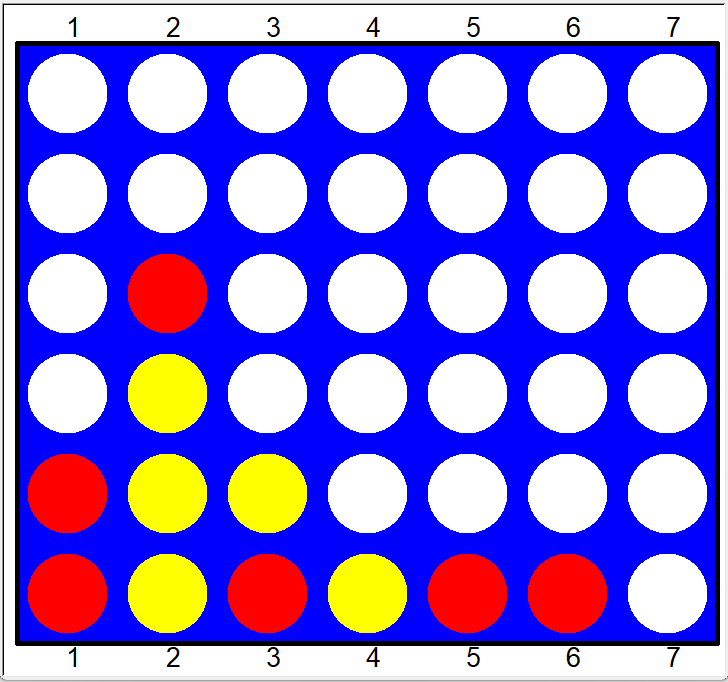

We therefore define a function to_avoid() to collect all moves that the AI player should avoid to prevent the opponent from winning in two steps. The function is included in the file ch03util.py, and is defined as follows:

In [15]:
def to_avoid(env):
    toavoid=[]
    # look for ones you should avoid
    for m in env.validinputs:
        if len(env.occupied[m-1])<=4:
            env_copy=deepcopy(env)
            s,r,done,_=env_copy.step(m) 
            s,r,done,_=env_copy.step(m)                     
            if done and r==-1:
                toavoid.append(m) 
    return toavoid

Later when we define the AI_think2() function, we'll program in such a way os that the AI player avoids moves generated by the function to_avoid(). 

## 4.2. Moves to Block
In the next case, the AI player should block a certain move so the opponent won’t win in two steps. In the game as shown below, it’s the yellow player’s turn. If the yellow player doesn’t choose column 1 in the next move, the opponent can choose column
1 and win on the following turn. Therefore, the yellow player should block this move.

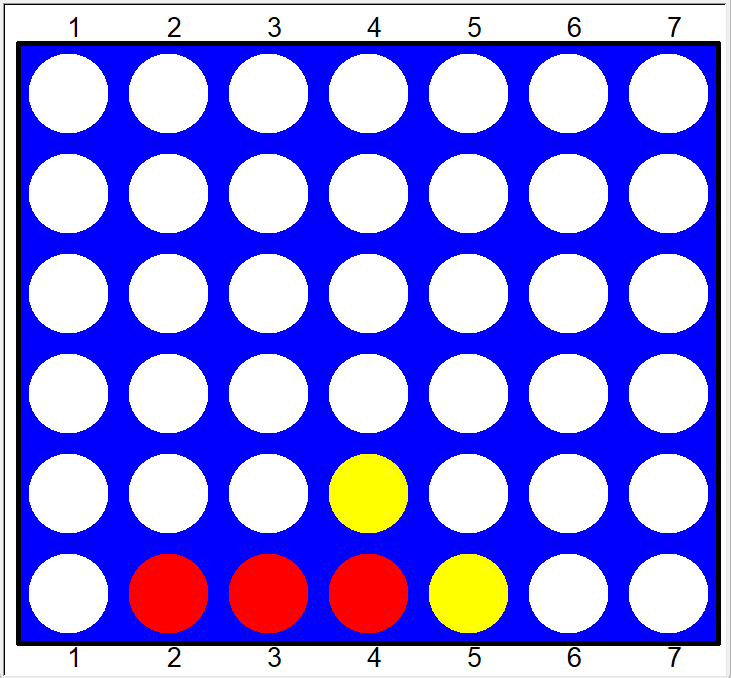

Later when we define the AI_think2() function, we iterature through all combinations of move m1 for the AI player and move m2 for the opponent, where m1 is different from m2. If the next two moves m1 and m2 leads to a win for the opponent in two steps, the AI player should block by placing a piece in m2 as the next move.  

## 4.3. A Think-Two-Steps-Ahead AI
We define a function AI_think2(). The function first checks if there is a move that wins the game for the AI player right away. If yes, it returns the move. Otherwise, the function checks if there is a move that should be blocked to prevent the opponent from winning two steps ahead. If yes, it blocks the opponents' move. If not, the function checks if there is a move that should be avoided to prevent the opponent from winning two steps ahead. If yes, the AI player randomly picks a valid move that's not one of the moves that should be avoided. 

The following function AI_think2() is defined in the file in the file ch03util.py in the /utils/ folder. If you have downloaded the file ch03util.py from the book's GitHub repository, the function is already defined in the file. 

In [16]:
def AI_think2(env):
    # See if there is a winning move 
    winner=AI_think1(env)
    # if yes, take it
    if winner is not None:
        return winner
    # look for ones you should block
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            if m1!=m2:
                env_copy=deepcopy(env)
                s,r,done,_=env_copy.step(m1) 
                s,r,done,_=env_copy.step(m2)                     
                # block your opponent's winning move
                if done and r!=0:
                    return m2 
    # look for ones you should avoid
    toavoid=to_avoid()
    if len(toavoid)>0:
        leftovers=[i for i in env.validinputs if i not in toavoid]
        if len(leftovers)>0:
            return random.choice(leftovers)
    # return None otherwise
    return None 

The function is applies to both players. 

Next, we'll play against the think-two-steps-ahead AI player and make sure it's working the way we intended it to do. 

## 3.2. Play against the Think-Two-Steps-Ahead AI
To play against the think-two-steps-ahead AI we just created, we use define the AI_vs_manual() function we have created before to play a game manually. 

We'll use AI_think2 as the argument in the AI_vs_manual() function. I'll choose to be player O this time.

In [17]:
from utils.ch03util import AI_think2

AI_vs_manual(env,AI_think2)

Do you want to be the red or the yellow player?yellow
the current state is state=
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
AI has chosen move 3
the current state is state=
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
enter your move:4
you have chosen move 4
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0]]
AI has chosen move 2
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  1 -1  0  0  0]]
enter your move:4
you have chosen move 4
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  1  1 -1  0  0  0]]
AI has chosen move 4
the current state is

As you can see above, the AI player has blocked me from winning twice by placing a piece in column 7. Looks like the AI_player2() function can indeed think two steps ahead and block the opponent's winning move.  

As an exercise, you can call the AI_vs_manual() and use AI_think2 as its argument and play a game with the AI player. Choose red at the beginning so that the AI player goes second. Create a winning opportunity for yourself and see if the AI blocks your winning move. 

## 4.3. Test the Efficacy of the Think-Two-Steps-Ahead AI

We again create an empty list *results* to store game outcomes. We simulate 1000 games. Half the time, the think-one-step-ahead AI player moves first and the other half of the time, the think-two-steps-ahead AI player moves first. This way, one player has a first-mover advantage. second. Whenever the think-two-steps-aheadAI player moves second, we multiple the outcome by -1 so that when a value 1 in the list *results* indicates that the think-two-steps-ahead AI player has won and the think-one-step-ahead AI player has lost. 

In [18]:
results=[]
for i in range(1000):
    # AI moves first if i is an even number
    if i%2==0:
        result=test_game(AI_think2,AI_think1)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=test_game(AI_think1,AI_think2)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the think-two-steps-ahead AI player move first. The outcome is added to the list *results*: 1 means the think-two-steps-ahead player wins and -1 means the think-one-step-ahead AI player wins. Whenever i is an odd number, we simulate a game and let the think-one-step-ahead AI player move first. We then multiply the outcome by -1 so that 1 means the think-two-steps-ahead AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the think-two-steps-ahead AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the think-two-steps-ahead AI player has lost. Like so:

In [19]:
# count how many times AI player has won
wins=results.count(1)
print(f"the think-two-steps-ahead AI won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the think-two-steps-ahead AI lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} games")  

the think-two-steps-ahead AI won 859 games
the think-two-steps-ahead AI lost 141 games
the game has tied 0 games


Results show that the think-two-steps-ahead AI player has won 859 out of the 1000 games; it has lost to the think-one-step-ahead player 141 times. There is no tie game. This indicates that the think-two-step-ahead AI player is clearly better than the think-one-step-ahead AI player. 

# 5. Think Three Steps Ahead
This next section will allow the AI player to think up to three steps ahead before taking its turn. If the AI player has no winning move in the next step and the opponent has no winning moves two steps ahead, the AI player will look three steps ahead.
It will take the next move that most likely leads to a win in three steps. In particular, if there’s a next move that guarantees the AI player to win in three steps, the AI palyer will select that next move as the best one.
Let’s use an example to demonstrate.

## 5.1. An Example of Winning in Three Steps
Consider the example as illustrated in the figure below. The red player is about to move, and if it chooses column 6 as its next move, it can create a double attack and gurantee a win in three steps: the red player can win by placing a piece in column 3 or column 7 in three steps and win the game. The yellow player can either block column 3 or column 7, but not both. 

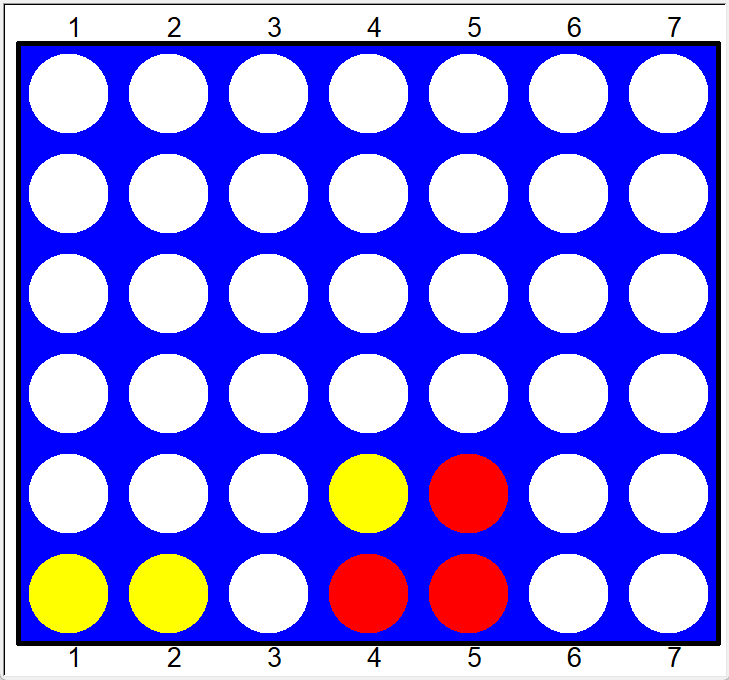

## 5.2. Create an AI Player Who Thinks Three Steps Ahead
We define a function AI_think3(). The function checks if there is a move that wins the game for the AI player right away or if the opponent has a winning move two steps ahead. If not, the player looks three steps ahead and choose the move that most likely leads to a win.  

Run the following code cell to define the function:

In [20]:
def AI_think3(env):
    # See if there is value from AI_think2() 
    think2=AI_think2(env)
    # if yes, take it
    if think2 is not None:
        return think2
    # look 3 steps ahead
    w3=[]
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            for m3 in env.validinputs:
                try:
                    env_copy=deepcopy(env)
                    s,r,done,_=env_copy.step(m1) 
                    s,r,done,_=env_copy.step(m2)   
                    s,r,done,_=env_copy.step(m3)                    
                    if done and r!=0:
                        w3.append(m1) 
                except:
                    pass
    # Choose the most frequent winner
    if len(w3)>0:
        return max(set(w3),key=w3.count)                
    # Take random move otherwise
    return random.choice(env.validinputs)

The function is applies to both player X and player O. 

Next, we'll play against the think-two-steps-ahead AI player and make sure it's working the way we intended it to do. 

## 5.3. Play against the Think-Three-Steps-Ahead AI
To play against the think-three-steps-ahead AI we just created, we use define the AI_vs_manual() function we have created before to play a game manually. 

We'll use AI_think3 as the argument in the AI_vs_manual() function. I'll choose to be player O and create an opportunity for Player X to have a double attack.

In [21]:
from utils.ch03util import AI_think3

AI_vs_manual(env,AI_think3)

Do you want to be the red or the yellow player?yellow
the current state is state=
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
AI has chosen move 3
the current state is state=
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
enter your move:7
you have chosen move 7
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 -1]]
AI has chosen move 3
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0 -1]]
enter your move:3
you have chosen move 3
the current state is state=
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0 -1]]
AI has chosen move 1
the current state is

As you can see above, when the AI player places a piece in column 4, it has created a double attack: it can win by placing a piece in column 1 or column 5. I can only block column 5 or column 1, but not both. So the AI player wins in three steps. 

As an exercise, you can call the AI_vs_manual() and use AI_think3 as its argument and play a game with the AI player. Choose yellow at the beginning so that the AI player goes first. Create an opportunity for the AI player to have a double attack and see if it indeed places a piece to create a double attack and win in three steps.

## 5.4. The Efficacy of the Think-Three-Steps-Ahead AI
Below, we'll the test_game() function to test the efficacy of the think-three-steps-ahead AI against the think-two-steps-ahead AI. 

We again create an empty list *results* to store game outcomes. We simulate 1000 games. Half the time, the think-three-steps-ahead AI player moves first and the other half of the time, the think-two-steps-ahead AI player moves first. This way, no player has a first-mover advantage. second. Whenever the think-three-steps-ahead AI player moves second, we multiple the outcome by -1 so that a value 1 in the list *results* indicates that the think-three-steps-ahead AI player has won.

In [22]:
results=[]
for i in range(1000):
    # AI moves first if i is an even number
    if i%2==0:
        result=test_game(env,AI_think3,AI_think2)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=test_game(env,AI_think2,AI_think3)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the think-two-steps-ahead AI player move first. The outcome is added to the list *results*: 1 means the think-two-steps-ahead player wins and -1 means the think-one-step-ahead AI player wins. Whenever i is an odd number, we simulate a game and let the think-one-step-ahead AI player move first. We then multiply the outcome by -1 so that 1 means the think-two-steps-ahead AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the think-two-steps-ahead AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the think-two-steps-ahead AI player has lost. Like so:

In [23]:
# count how many times AI player has won
wins=results.count(1)
print(f"the think-three-steps-ahead AI won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the think-three-steps-ahead AI lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")  

the think-three-steps-ahead AI won 566 games
the think-three-steps-ahead AI lost 369 games
the game has tied 65 times


Results show that the think-two-steps-ahead AI player has won 566 out of the 1000 games; it has lost to the think-one-step-ahead player 369 times. There are a total of 65 tie games. This indicates that the think-three-step-ahead AI player is clearly better than the think-two-steps-ahead AI player. 